In [1]:
import pandas as pd
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gzip 
import math
import itertools
from time import time
from tqdm import tqdm
import tqdm.notebook as tq
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import os
import vec_tools
import random
import plotly
import plotly.graph_objs as go
import numpy as np
import pickle
#import streamlit as st
from sklearn.decomposition import PCA

# Load the model

In [2]:
input_dir = "D:/google_ngrams/vectors/"
decade_files = [str(1900+10*i)+'_model' for i in range(10)]

decades_dict = OrderedDict()
for i in range(10):
    decades_dict[str(1900+10*i)] = str(1900+10*i)+'_model'
                 

col = "histwords_engall" #"histwords_engall", "histwords_engfic", gb_12_full_full", "gb_12_18_02" in progress
year = "1990"
fil = year + "_model" #f'w2vmodel_ng5_{year}.gz_5'
input_dir = input_dir + col + "/"

wvs = vec_tools.load_wvs(decades_dict, input_dir=input_dir, kv=True)
wv = wvs["1990"]
#wv = tools.load_wv("D:/google_ngrams/vectors/gb_12_18_02w2vmodel_ng5_sg_1900.gz_full")

In [3]:
# test run


# Check model

In [4]:
#print(len(wv.index_to_key))
#vec_tools.check_words(wv)
w1="nationality"
w2="drunk"
#vec_tools.calc_similarity(wv,w1,w2)
#print(f"5 most similar to {w1}: ", wv.most_similar(positive=[w1], topn=100))
#wv.most_similar(positive="class", negative="school", topn=40)

# Import antonym lists

In [5]:
ant_pairs = {}
dims = ["cultivation", "status","morality", "education", "gender", "race", "affluence"]
for dim in dims:
    ant_pairs[dim] = pd.read_csv(f"G:/My Drive/KU/Thesis/data/word_pairs/{dim}_antonyms_goc.csv", sep=",", header = None)


# Make word dimensions

In [6]:
dims = {}
evals = {}
for key, val in ant_pairs.items():
    val.to_csv
for key, val in ant_pairs.items():
    print(key, val)
    dims[key] = vec_tools.create_dim(wv, val, print_miss=True)#, eval=True)
dims

cultivation         0           1             2
0   index     Refined     Unrefined
1       2  cultivated  uncultivated
2       3    cultured    uncultured
3       4   civilized   uncivilized
4       5   courteous  discourteous
5       6      proper      improper
6       7      polite          rude
7       8     cordial     uncordial
8       9      formal      informal
9      10     courtly     uncourtly
10     11      urbane       boorish
11     12    polished    unpolished
12     13     refined     unrefined
13     14    civility    incivility
14     15       civil   uncivilized
15     16    urbanity   boorishness
16     17   politesse      rudeness
17     18     edified       loutish
18     19    mannerly    unmannerly
19     20    polished         gruff
20     21    gracious    ungracious
21     22    obliging    unobliging
22     23    cultured    uncultured
23     24     genteel      ungeteel
24     25    mannered    unmannered
25     26      polite         blunt
m ['uncordial', 

G:\My Drive\KU\Thesis\vec_tools.py:155: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
G:\My Drive\KU\Thesis\vec_tools.py:155: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))
G:\My Drive\KU\Thesis\vec_tools.py:155: RuntimeWarning: invalid value encountered in true_divide
  return vec/(np.sqrt(np.nansum(np.square(vec))))


[array([-0.02670048, -0.09558584, -0.06510797,  0.05178379, -0.08741266,
       -0.01541566, -0.01746319, -0.0788637 , -0.01025789, -0.00132008,
        0.12129544,  0.0045262 ,  0.06686601, -0.07468487,  0.04847713,
        0.08770339, -0.03180846,  0.07415316,  0.02975972, -0.0415437 ,
        0.05265221, -0.02870434,  0.04616282,  0.02437851, -0.00097413,
       -0.07975683,  0.09719142,  0.08822054,  0.01785169, -0.07545665,
        0.11025608,  0.03745878, -0.00449945, -0.06211553,  0.10006329,
       -0.01156025, -0.08803964, -0.05123788, -0.01602839,  0.00546361,
       -0.04422542,  0.06166221,  0.06817682,  0.04519983,  0.01747824,
        0.03123819,  0.04790922,  0.00526467,  0.01642553, -0.07605232,
        0.09048174, -0.04356328,  0.00499149,  0.02142832, -0.01691457,
       -0.01723384,  0.03365096, -0.0593206 ,  0.04219373,  0.0132159 ,
       -0.00657986,  0.00189148, -0.00668085,  0.05453577, -0.00859253,
       -0.06837536, -0.0479083 , -0.02465644,  0.05150593,  0.0

{'cultivation': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan

In [7]:
evals

{}

# Find angles between words & dimensions

In [8]:
dim_angles = {dim : {} for dim, vec in dims.items()}
for dim1, vec1 in dims.items():
    for dim2, vec2 in dims.items():
        if dim1 == dim2:
            continue
        angle = vec_tools.vector_angle(vec1, vec2)
        dim_angles[dim1][dim2] = angle
       # print(f"Angle between {dim1} and {dim2} is {angle}")
dim_angles = pd.DataFrame(dim_angles)

# Project vector onto dimension

In [9]:
#load from file
#matrix = np.loadtxt("1900.txt", usecols = range(1,301))
#as property of KeyedVectors
matrix = wv.get_normed_vectors()
norm_matrix = vec_tools.normify_matrix(matrix)
#Project word embeddings onto a dimension
projs = {}

for dim, dim_vec in dims.items():
    projs[dim] = vec_tools.proj_dim(dim_vec, norm_matrix)
#aff_proj = proj_dim(aff_dim, norm_matrix)
#race_proj = proj_dim(race_dim, norm_matrix)
projs

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]


{'cultivation': array([nan, nan, nan, ..., nan, nan, nan], dtype=float32),
 'status': array([ 0.06077903,  0.01280803, -0.02227818, ...,         nan,
                nan,         nan], dtype=float32),
 'morality': array([nan, nan, nan, ..., nan, nan, nan], dtype=float32),
 'education': array([ 0.21943542, -0.1713347 ,  0.08254202, ...,         nan,
                nan,         nan], dtype=float32),
 'gender': array([-0.02843999, -0.0126652 ,  0.12431569, ...,         nan,
                nan,         nan], dtype=float32),
 'race': array([-0.00590326, -0.00627685,  0.09407342, ...,         nan,
                nan,         nan], dtype=float32),
 'affluence': array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)}

# Create/load domains

In [10]:
domain_dic = {}
domain_dic["sports"] = vec_tools.wiki2words("List of Sports")
doms = [ 'virtues.txt', 'vices.txt', 'genres.txt', 'emotions.txt', 'housing.txt', 'housing_uk.txt',
 'clothing.txt', 'white_trash.txt', 'old_rich.txt', 'new_rich.txt', 'u.txt', 'new_u.txt', 'non_u.txt',
 'refined.txt', 'unrefined.txt']
for dic in doms:
    li = open(f"G:/My Drive/KU/Thesis/data/domains/{dic}").readlines()
    domain_dic[dic[:-4]] = [el.strip() for el in li]
domain_dic.keys()

dict_keys(['sports', 'virtues', 'vices', 'genres', 'emotions', 'housing', 'housing_uk', 'clothing', 'white_trash', 'old_rich', 'new_rich', 'u', 'new_u', 'non_u', 'refined', 'unrefined'])

# Misc functions

In [11]:

vec_tools.stereotype_through_time(wvs, word="hate", word_list = domain_dic["virtues"], type="word_list", select="JJ", selectn=10, topn= 10000)
wls = [["love", "hate", "beauty"], ["man", "woman"],["masculine", "feminine"],["man", "male", "men", "masculine"], ["donkey", "speaker", "glass", "handle"]]
for l in wls:
    print(l, "\n", vec_tools.measure_word_space(wv, norm_matrix, l))
#measure_word_space(wv, norm_matrix, word_list)

#vec_tools.most_similar_tag(word=domain_dic["virtues"], wv=wvs["1990"], dim=True, tagger=vec_tools.wn_tagger)
#wvs["1990"].most_similar("hello", topn= 1000000)[-37000] #first 13k have a value, 
#vec_tools.get_most_similar(wv, norm_matrix, "hello")[13000]

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:783: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


['love', 'hate', 'beauty'] 
 0.6635499
['man', 'woman'] 
 0.47126374
['masculine', 'feminine'] 
 0.43424225
['man', 'male', 'men', 'masculine'] 
 0.7509665
['donkey', 'speaker', 'glass', 'handle'] 
 0.8436596


In [12]:
survey = pd.read_csv("G:/My Drive/KU/Thesis/data/survey_data/survey_means_weighted.csv")
survey = survey.rename(columns= {"Unnamed: 0": "words"})
survey = survey.set_index("words")
survey

,gender_mean,affluence_mean,race_mean
words,,,
basketball,72.49233,37.48029,81.05358
baseball,77.60552,46.90747,38.39533
boxing,86.39916,36.92365,64.95531
softball,32.61073,45.31939,26.82060
volleyball,31.83629,54.05517,25.81080
tennis,42.65294,75.34252,25.93527
golf,64.92760,82.92412,21.00702
hockey,84.42197,40.18831,18.71368
soccer,64.12531,44.74304,35.91770


Outputs:
Analysis: Ordered dict of decades: lists in descending order of relevance of tuples with (word, similarity score)
Vis: heatmap going down -> polar graph split up into domains with circles of most similar

Analysis: list of values of each domain item's projection onto dimension
VIs: graphs of domain on dim1 x dim2



Managers, directors and senior officials
Professional
Associate professional and technical
Administrative
Skilled
Manual
Arts
Other
General


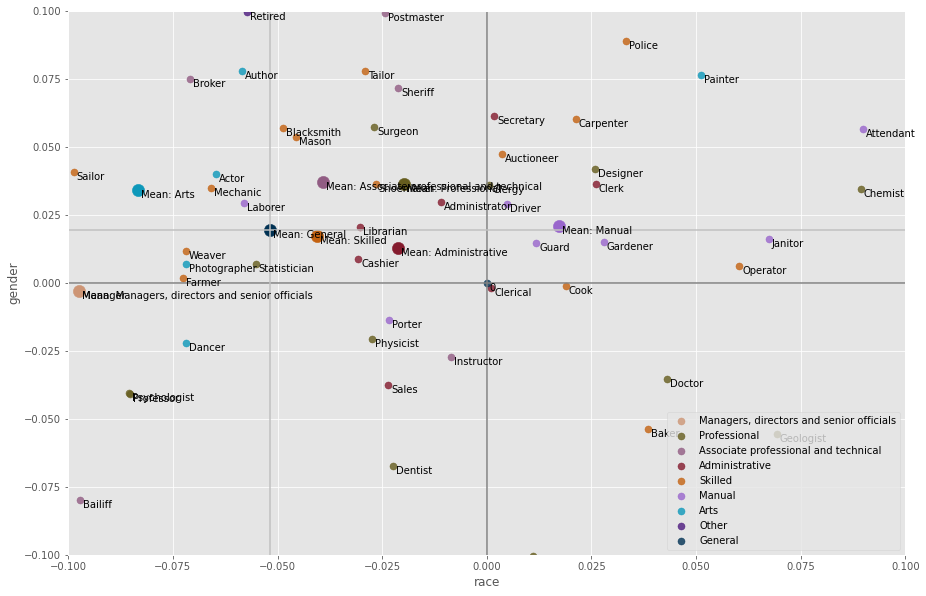

In [13]:
import statistics
def chart_project(proj_1, p1_label, proj_2, p2_label, title, domain_dic, wv, dim_1_span, dim_2_span, show=True):
    inds = []
    projs = {cat: {"dim_1": {}, "dim_2": {}} for cat in domain_dic.keys()}
    means = {cat: {"dim_1": [], "dim_2": []} for cat in domain_dic.keys()}
    means["General"] = {"dim_1": [0], "dim_2": [0]}
    projs["General"] = {"dim_1": [0], "dim_2": [0]}

    for cat, lst in domain_dic.items():
        for word in lst:
            try:
                ind = wv.get_index(word.lower())
                inds.append(ind)
                val1, val2 = proj_1[ind], proj_2[ind]
                means[cat]["dim_1"].append(val1)
                means[cat]["dim_2"].append(val2)
                #projs = (val1, val2)
                projs[cat]["dim_1"][word] = val1
                projs[cat]["dim_2"][word] = val2
                
            except Exception as e:
                continue
   #means = {cat: {"dim_1": statistics.mean([word for word in projs[cat]["dim_1"]]), "dim_2": statistics.mean([word for word in projs[cat]["dim_2"]])} for cat in projs.keys()}
    for cat in means.keys():
        means[cat]["dim_1"] = statistics.mean(means[cat]["dim_1"])
        means[cat]["dim_2"] = statistics.mean(means[cat]["dim_2"])
    means["General"]["dim_1"] = statistics.mean([means[cat]["dim_1"] for cat in means.keys() if cat != "General"])
    means["General"]["dim_2"] = statistics.mean([means[cat]["dim_2"] for cat in means.keys() if cat != "General"])

    #return projs
    plt.style.use("ggplot")
    #colours = {i: colour["color"] for i, colour in enumerate(plt.rcParams['axes.prop_cycle'])}
    colours = ["#CD9575", "#665D1E", "#915C83", "#841B2D", "#C46210", "#9966CC", "#0D98BA", "#4D1A7F", "#003153"]
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlabel(p1_label)
    ax.set_ylabel(p2_label)
    ax.set_xlim(left=dim_1_span[0], right=dim_1_span[1])
    ax.set_ylim(bottom=dim_2_span[0], top=dim_2_span[1])
    ax.axvline(x=0, c="grey")#, label="x=0")
    ax.axhline(y=0, c="grey")#, label="y=0")
    ax.axvline(x=means["General"]["dim_1"], c="silver")#, label="x=0")
    ax.axhline(y=means["General"]["dim_2"], c="silver")#, label="y=0")
    ax
    i = 0
    for cat, dic in projs.items():
        print(cat)
        ax.scatter(means[cat]["dim_1"], means[cat]["dim_2"], marker = "o", s=150, color = colours[i])
        ax.annotate(text= "Mean: " + cat, xy=(means[cat]["dim_1"], means[cat]["dim_2"]),
                    xytext= (3,-8), textcoords="offset points" )
        df = pd.DataFrame(dic)
        ax.scatter(df.loc[:, "dim_1"], df.loc[:, "dim_2"], label=cat, s=50, marker="o", alpha= 0.8, color=colours[i])
        for idx, row in df.iterrows():
                ax.annotate(text=row.name, xy=(row["dim_1"], row["dim_2"]), xytext= (3,-8), textcoords="offset points" )
        i += 1
    ax.legend()
    plt.savefig(title, format="png")
    if show == False:
        plt.clf()
        

df = vec_tools.load_domain_dic(f"G:/My Drive/KU/Thesis/data/domains/dicts/occupations_1950_categorised.xlsx")
os.chdir("G:/My Drive/KU/Thesis/outputs/graphs")
chart_project(domain_dic=df, wv=wv, proj_1=projs["race"], p1_label= "race", p2_label = "gender", proj_2=projs["gender"], dim_1_span = (-0.1, 0.1), dim_2_span = (-0.1, 0.1), title="test.png")

In [14]:
from matplotlib import cm
plt.get_cmap("Pastel1")
colours = {i: colour["color"] for i, colour in enumerate(plt.rcParams['axes.prop_cycle'])}

In [15]:
import vec_tools
wl= ['acceptance','accomplishment','accountability','accuracy','achievement','adaptability','alertness','altruism','ambition','amusement','assertiveness','attentive','awareness','balance','beauty','boldness','bravery','brilliance','calm','candor','capable','careful','certainty','challenge','charity','cleanliness','clear','clever','comfort','commitment','common','sense','communication','community','compassion','competence','concentration','confidence','connection','consciousness','consistency','contentment','contribution','control','conviction','cooperation','courage','courtesy','creation','creativity','credibility','curiosity','decisive','decisiveness','dedication','dependability','determination','development','devotion','dignity','discipline','discovery','drive','effectiveness','efficiency','empathy','empower','endurance','energy','enjoyment','enthusiasm','equality','ethical','excellence','experience','exploration','expressive','fairness','family','famous','fearless','feelings','ferocious','fidelity','focus','foresight','fortitude','freedom','friendship','fun','generosity','genius','giving','goodness','grace','gratitude','greatness','growth','happiness','hard','work','harmony','health','honesty','honor','hope','humility','humor','imagination','improvement','independence','individuality','innovation','inquisitive','insightful','inspiring','integrity','intelligence','intensity','intuitive','joy','justice','kindness','knowledge','lawful','leadership','learning','liberty','logic','love','loyalty','mastery','maturity','meaning','moderation','motivation','openness','optimism','order','organization','originality','passion','patience','peace','performance','persistence','playfulness','poise','potential','power','present','productivity','professionalism','prosperity','purpose','quality','realistic','reason','recognition','recreation','reflective','respect','responsibility','restraint','results-oriented','reverence','rigor','risk','satisfaction','security','self-reliance','selfless','sensitivity','serenity','service','sharing','significance','silence','simplicity','sincerity','skill','skillfulness','smart','solitude','spirit','spirituality','spontaneous','stability','status','stewardship','strength','structure','success','support','surprise','sustainability','talent','teamwork','temperance','thankful','thorough','thoughtful','timeliness','tolerance','toughness','traditional','tranquility','transparency','trust','trustworthy','truth','understanding','uniqueness','unity','valor','victory','vigor','vision','vitality','wealth','welcoming','winning','wisdom','wonder'] #https://scottjeffrey.com/core-values-list/
vec_tools.most_similar_wlist("executive", wv, word_list=wl, dim=False, topn=10000, selectn=10)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:783: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


['organization',
 'accountability',
 'empower',
 'leadership',
 'responsibility',
 'security',
 'power',
 'stewardship',
 'competence',
 'loyalty']

In [16]:
wv.most_similar(positive=["class"], negative=["school", "antigens"],topn=50)

[('bourgeoisie', 0.3233729600906372),
 ('peasantry', 0.3066210448741913),
 ('privileged', 0.28269681334495544),
 ('proletariat', 0.281339168548584),
 ('respectable', 0.2686350345611572),
 ('category', 0.2633473873138428),
 ('capitalists', 0.2533317804336548),
 ('castes', 0.2454962432384491),
 ('oppressed', 0.24373559653759003),
 ('classes', 0.24325183033943176),
 ('backward', 0.2396502047777176),
 ('bourgeois', 0.23953548073768616),
 ('owning', 0.23939061164855957),
 ('graceful', 0.2389780580997467),
 ('impoverished', 0.23871758580207825),
 ('frightful', 0.23790182173252106),
 ('weaker', 0.23365961015224457),
 ('aristocracy', 0.2308768332004547),
 ('oppression', 0.22859622538089752),
 ('lowest', 0.22699278593063354),
 ('prosperous', 0.22438405454158783),
 ('creatures', 0.22428138554096222),
 ('peasants', 0.22257468104362488),
 ('appropriation', 0.21936242282390594),
 ('imposing', 0.21821042895317078),
 ('landlord', 0.21415185928344727),
 ('vague', 0.21376851201057434),
 ('struggles', 0

In [17]:
def append_list(sim_words, words):
    
    list_of_words = []
    
    for i in range(len(sim_words)):
        
        sim_words_list = list(sim_words[i])
        sim_words_list.append(words)
        sim_words_tuple = tuple(sim_words_list)
        list_of_words.append(sim_words_tuple)
        
    return list_of_words

def prep_vars():
input_list = []
for key, val in df.items():
    input_list.extend(val)
input_word = ""
for i,el in enumerate(input_list[:5]):
    input_word = input_word + el.lower()+ ","
input_word = input_word[:-1]
#input_word = "manager, 
topn = 5
user_input = [x.strip() for x in input_word.split(',')]
result_word = []
    
for words in user_input:
    
        sim_words = wv.most_similar(words.lower(), topn = topn)
        sim_words = append_list(sim_words, words)
            
        result_word.extend(sim_words)
    
similar_word = [word[0] for word in result_word]
similarity = [word[1] for word in result_word] 
similar_word.extend(user_input)
labels = [word[2] for word in result_word]
label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
color_map = [label_dict[x] for x in labels]
input_word
#print(user_input,"\n", result_word,"\n", similar_word, "\n",similarity, "\n",labels, "\n",label_dict,"\n", color_map)

#prep variables from dictionary of lists
dic = df
topns = [len(val) for key, val in dic.items()] #amount in each list
sims = []
centroids = []
for key, val in dic.items():
    sims.extend(val)
    centroids.append(key)
#sims.extend(centroids)
print(sims, centroids)
#similar_word = list of adjacent words with centroids at end.

IndentationError: expected an indented block (Temp/ipykernel_22852/1016206165.py, line 15)

In [ ]:
df

In [ ]:

similar_word, labels, label_dict, color_map = prep_vars(["manager", "hellO"])
#prep my own variables from dictionary of lists
dic = dic
topns = [len(val) for key, val in dic.items()] #amount in each list
sims = []
centroids = []
for key, val in dic.items():
    sims.extend(val)
    centroids.append(key)
#sims.extend(centroids)
print(sims, centroids)
#similar_word = list of adjacent words with centroids at end.
#print(user_input,"\n", result_word,"\n", similar_word, "\n",similarity, "\n",labels, "\n",label_dict,"\n", color_map)
#user_input = input words, result_word = similar word lists, similar_word = just words of previous, similarity = cosine similarity, label = original word 4 each, label_dict = labels for colours, color_map = actully used 

In [ ]:
def display_pca_scatterplot_3D(model, dims=2, user_input=None, words=None, label=None, color_map=None, similars=True, topns=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    word_vectors = np.array([model[w.lower()] for w in words])
    
    if dims==3:
        three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:3]
        fun = go.Scatter3d
    elif dims==2:
    # For 2D, change the three_dim variable into something like two_dim like the following:
        three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]
        fun = go.Scatter
    
    if similars:
        topns = [topns for i in range(len(user_input))]
        
        

    data = []
    count = 0
    means = []
    
    for i in range (len(user_input)):

                trace = fun(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                means.append((np.mean(three_dim[count:count+topn], axis=0)))
                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
                data.append(trace)
                count = count+topns[i]
    means=np.array(means)
    if similars:
        trace_input = fun(
                        x = three_dim[count:,0], 
                        y = three_dim[count:,1],  
                        z = three_dim[count:,2],
                        text = words[count:],
                        name = 'input words',
                        textposition = "top center",
                        textfont_size = 20,
                        mode = 'markers+text',
                        marker = {
                            'size': 10,
                            'opacity': 1,
                            'color': 'black'
                        }
                        )
    else:
        trace_input = fun(
                        x = means[:,0], 
                        y = means[:,1], 
                        z = means[:,2],
                        text = words[count:],
                        name = 'Means',
                        textposition = "top center",
                        textfont_size = 20,
                        mode = 'markers+text',
                        marker = {
                            'size': 10,
                            'opacity': 1,
                            'color': 'black'
                        }
                        )
        

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
        data.append(trace_input)
    
# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()
color_map
display_pca_scatterplot_3D(model=wv, dims=3, user_input=user_input, words=similar_word, label=labels, color_map=color_map, topns=topn)

In [ ]:
display_pca_scatterplot_3D(model=wv, dims=3, similars=False, user_input=centroids, words=sims, label=labels, color_map=color_map, topns=topns)

In [ ]:
wv.most_similar(positive=["cultivated", "brow"])